In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls drive/MyDrive/itmo_job

 lab2_test.csv	     'Заверение о незамещении гос.службы.doc'
 lab2_train_cor.csv  '_Личный листок.doc'
 lab2_train.csv      '_регламент для трудоустройства (дистанционный).docx'
 lab2_train_lem.csv  'Согласие на обработку ПДН_общее.pdf'
 models		     'Согласие на обработку ПДн (размещение на сайте).pdf'
 news.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lemmatizer (both datasets)

In [13]:
# df = pd.read_csv("drive/MyDrive/itmo_job/lab2_train.csv")
df = pd.read_csv("drive/MyDrive/itmo_job/lab2_test.csv", sep=";")
df.head()

,index,work_name,generalized_work_class,global_work_class
0,507695.0,"монтаж шаровых кранов, дроссельной шайбы, запо...",Монтаж мк,Монтаж мк
1,464317.0,монтаж кипиа и зра с электроприводом,Монтаж ЗРА,Монтаж
2,43108.0,монтаж оборудования и приборов,Монтаж приборов,Монтаж
3,114289.0,тх./поз.2.13.1-2/монтаж арматуры,Монтаж арматуры,Монтаж
4,331380.0,"монтаж шаровых кранов, огнепреградителя, дросс...",Монтаж мк,Монтаж мк


In [14]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

mystem = Mystem()
russian_stopwords = stopwords.words("russian")

idx = 1
def preprocess_text(text):
    global idx
    if idx%100000 == 0:
        print(idx)
    idx += 1

    tokens = mystem.lemmatize(str(text).lower())
    tokens = [token for token in tokens if token not in russian_stopwords\
              and token != " " \
              and token.strip() not in punctuation]

    text = " ".join(tokens)

    return text

df["work_name_lem"] = df["work_name"].apply(preprocess_text)
idx = 1
df["generalized_work_class_lem"] = df["generalized_work_class"].apply(preprocess_text)
idx = 1
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


100000
100000


,index,work_name,generalized_work_class,global_work_class,work_name_lem,generalized_work_class_lem
0,507695.0,"монтаж шаровых кранов, дроссельной шайбы, запо...",Монтаж мк,Монтаж мк,монтаж шаровой кран дроссельный шайба запорный...,монтаж мк
1,464317.0,монтаж кипиа и зра с электроприводом,Монтаж ЗРА,Монтаж,монтаж кипиа зра электропривод,монтаж зра
2,43108.0,монтаж оборудования и приборов,Монтаж приборов,Монтаж,монтаж оборудование прибор,монтаж прибор
3,114289.0,тх./поз.2.13.1-2/монтаж арматуры,Монтаж арматуры,Монтаж,тх поза 2.13 1 2 монтаж арматура,монтаж арматура
4,331380.0,"монтаж шаровых кранов, огнепреградителя, дросс...",Монтаж мк,Монтаж мк,монтаж шаровой кран огнепреградитель дроссельн...,монтаж мк


In [15]:
# df.to_csv("drive/MyDrive/itmo_job/lab2_train_lem.csv", index=False)
df.to_csv("drive/MyDrive/itmo_job/lab2_test_lem.csv", index=False)

# Spellchecker (both datasets)

In [16]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.5 MB/s eta 0:00:00


In [17]:
# df = pd.read_csv("drive/MyDrive/itmo_job/lab2_train_lem.csv")
df = pd.read_csv("drive/MyDrive/itmo_job/lab2_test_lem.csv")
df.head()

,index,work_name,generalized_work_class,global_work_class,work_name_lem,generalized_work_class_lem
0,507695.0,"монтаж шаровых кранов, дроссельной шайбы, запо...",Монтаж мк,Монтаж мк,монтаж шаровой кран дроссельный шайба запорный...,монтаж мк
1,464317.0,монтаж кипиа и зра с электроприводом,Монтаж ЗРА,Монтаж,монтаж кипиа зра электропривод,монтаж зра
2,43108.0,монтаж оборудования и приборов,Монтаж приборов,Монтаж,монтаж оборудование прибор,монтаж прибор
3,114289.0,тх./поз.2.13.1-2/монтаж арматуры,Монтаж арматуры,Монтаж,тх поза 2.13 1 2 монтаж арматура,монтаж арматура
4,331380.0,"монтаж шаровых кранов, огнепреградителя, дросс...",Монтаж мк,Монтаж мк,монтаж шаровой кран огнепреградитель дроссельн...,монтаж мк


In [18]:
from spellchecker import SpellChecker

rus = SpellChecker(language='ru')
print(rus.correction("монтад"))

монтаж


In [19]:
col = df["work_name_lem"]
word_list = []
for c in col:
    word_list.extend(str(c).split())

def not_num(word):
    return not any(i.isdigit() for i in word)

words = set(filter(not_num, word_list))
unknown = set([w if w not in rus else "" for w in words])
unknown.remove("")
known = words - unknown

print(f"{len(known)}/{len(words)} known")
print(list(known)[:10])
print(list(unknown)[:10])

558/2714 known
['длина', 'внутри', 'взаимодействие', 'иметь', 'пэ', 'ти', 'зонд', 'нахождение', 'оп', 'ооо']
['плакат', 'соляный', 'подтрубопровод', 'подсыпка', 'имонтаж', 'lh', 'геодезический', 'душевой', 'предупредительный', 'слой']


There are correct words among unrecognized - let's use a better dictionary.

In [20]:
!git clone https://github.com/hingston/russian.git
!git clone https://github.com/danakt/russian-words.git

Cloning into 'russian'...
remote: Enumerating objects: 16, done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 16
Receiving objects: 100% (16/16), 576.38 KiB | 1.81 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Cloning into 'russian-words'...
remote: Enumerating objects: 56, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 56 (delta 0), reused 1 (delta 0), pack-reused 50
Receiving objects: 100% (56/56), 16.39 MiB | 15.94 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [21]:
!ls russian

100000-russian-words.txt	       10000-russian-words.txt		      LICENSE.md
10000-russian-words-cyrillic-only.txt  50000-russian-words-cyrillic-only.txt  README.md


In [22]:
!ls russian-words
!iconv -f WINDOWS-1251 -t UTF-8 russian-words/russian.txt > russian_utf8.txt
!ls

LICENSE  README.md  russian_surnames.txt  russian.txt
drive  russian	russian_utf8.txt  russian-words  sample_data


In [23]:
with open("russian/100000-russian-words.txt", "r") as f:
    rus1 = f.read().splitlines()

with open("russian_utf8.txt", "r") as f:
    rus2 = f.read().splitlines()

print(rus1[1000:1010])
print(rus2[1000:1010])

rus_dict = set(rus1) | set(rus2)
print(len(rus_dict))

['медленно', 'старик', 'прочий', 'победа', 'c', 'элемент', 'естественно', 'обратиться', 'постоянный', 'встречаться']
['Абрамов', 'абрамова', 'Абрамович', 'Абрамовича', 'Абрамовичам', 'Абрамовичами', 'Абрамовичах', 'Абрамовиче', 'Абрамовичей', 'Абрамовичем']
1570865


In [24]:
col = df["work_name_lem"]
word_list = []
for c in col:
    word_list.extend(str(c).split())

def not_num(word):
    return not any(i.isdigit() for i in word)

words = set(filter(not_num, word_list))
unknown = set([w if w not in rus_dict else "" for w in words])
unknown.remove("")
known = words - unknown

print(f"{len(known)}/{len(words)} = {len(known)/len(words)*100:.2f}% known")
print(list(known)[:10])
print(list(unknown)[:10])

1951/2714 = 71.89% known
['плакат', 'соляный', 'зонд', 'подсыпка', 'показывать', 'геодезический', 'цифровой', 'новый', 'душевой', 'полевой']
[',,,', 'тромбование', 'тпс', 'тднс', 'мегаомметр', 'оброрудование', 'подтрубопровод', 'металлокрнструкция', 'catalyst', 'волоконно-оптический']


In [25]:
def fix_word(w):
    if pd.isna(w):
        return ""
    return rus.correction(str(w))

fix_dict = {}
for uk in unknown:
    fix_dict[uk] = fix_word(uk)

# fix_dict

In [26]:
'монтад' in fix_dict

True

In [27]:
def fix_cell(cell):
    global idx
    if idx % 100000 == 0:
        print(idx)
    idx += 1

    if pd.isna(cell):
        return cell
    tokens = str(cell).split()
    ans = []
    for t in tokens:
        if t in rus_dict:
            ans.append(t)
        elif t in fix_dict:
            ans.append(fix_dict[t])
    try:
        return " ".join(ans)
    except:
        return ""

In [28]:
idx = 1
df["work_name_cor"] = df["work_name_lem"].apply(fix_cell)
idx = 1
df["generalized_work_class_cor"] = df["generalized_work_class_lem"].apply(fix_cell)
df.head()

100000
100000


,index,work_name,generalized_work_class,global_work_class,work_name_lem,generalized_work_class_lem,work_name_cor,generalized_work_class_cor
0,507695.0,"монтаж шаровых кранов, дроссельной шайбы, запо...",Монтаж мк,Монтаж мк,монтаж шаровой кран дроссельный шайба запорный...,монтаж мк,монтаж шаровой кран дроссельный шайба запорный...,монтаж мк
1,464317.0,монтаж кипиа и зра с электроприводом,Монтаж ЗРА,Монтаж,монтаж кипиа зра электропривод,монтаж зра,монтаж типа зра электропривод,монтаж зра
2,43108.0,монтаж оборудования и приборов,Монтаж приборов,Монтаж,монтаж оборудование прибор,монтаж прибор,монтаж оборудование прибор,монтаж прибор
3,114289.0,тх./поз.2.13.1-2/монтаж арматуры,Монтаж арматуры,Монтаж,тх поза 2.13 1 2 монтаж арматура,монтаж арматура,тх поза монтаж арматура,монтаж арматура
4,331380.0,"монтаж шаровых кранов, огнепреградителя, дросс...",Монтаж мк,Монтаж мк,монтаж шаровой кран огнепреградитель дроссельн...,монтаж мк,,монтаж мк


In [29]:
# df.to_csv("drive/MyDrive/itmo_job/lab2_train_cor.csv", index=False)
df.to_csv("drive/MyDrive/itmo_job/lab2_test_cor.csv", index=False)

# BERTopic

In [ ]:
df = pd.read_csv("drive/MyDrive/itmo_job/lab2_train_cor.csv")
df = df[["work_name_cor", "generalized_work_class_cor"]]
df.head()

,work_name_cor,generalized_work_class_cor
0,монтаж ограждение основание блок управление са,NaN
1,монтаж стойка,NaN
2,монтаж трубопровод газ предохранительный клапа...,NaN
3,монтаж лестница,монтаж лестница
4,монтаж площадка,NaN


In [ ]:
!pip install bertopic

In [ ]:
mask = df['work_name_cor'].str.len() >= 1
df = df.loc[mask].dropna()
df['work_name_cor'] = df['work_name_cor'].astype('str')
df.head()

,work_name_cor,generalized_work_class_cor
3,монтаж лестница,монтаж лестница
7,типа,монтаж прибор
9,электромонтажный работа,пор
10,погружение свая,погружение свая
12,монтаж система вк,испытание система водоснабжение


In [ ]:
from sklearn import preprocessing

lbl = preprocessing.LabelEncoder()
df["target"] = lbl.fit_transform(df["generalized_work_class_cor"].values.astype('str'))

df.head()

,work_name_cor,generalized_work_class_cor,target
3,монтаж лестница,монтаж лестница,117
7,типа,монтаж прибор,142
9,электромонтажный работа,пор,180
10,погружение свая,погружение свая,176
12,монтаж система вк,испытание система водоснабжение,60


In [ ]:
docs = df["work_name_cor"].to_list()
print("DOCS:", docs[:10])

waiyu = df["target"].to_list()
print("外语:", waiyu[:10])

DOCS: ['монтаж лестница', 'типа', 'электромонтажный работа', 'погружение свая', 'монтаж система вк', 'монтаж стойка', 'монтаж балка эстакада', 'монтаж стойка', 'погружение свая', 'монтаж балка эстакада']
外语: [117, 142, 180, 176, 60, 124, 124, 124, 176, 124]


In [ ]:
print(len(docs))
dominance = len(docs) == len(waiyu)

assert dominance

272301


In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs, y=waiyu)

In [ ]:
topic_model.save("drive/MyDrive/itmo_job/models", serialization="safetensors", save_ctfidf=True)

In [ ]:
# topic_model.reduce_topics(docs, nr_topics=30)

In [ ]:
info_df = topic_model.get_topic_info()
info_df.head()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,8176,-1_мн_греть_ко_верх,"[мн, греть, ко, верх, соприкасаться, боковой, ...",[антикоррозионный защита боковой поверхность с...
1,0,7864,0_балка_монтаж__,"[балка, монтаж, , , , , , , , ]","[монтаж балка, монтаж балка, монтаж балка]"
2,1,7510,1_пор_со_заготовка_бри,"[пор, со, заготовка, бри, , , , , , ]","[пор, пор, пор]"
3,2,6966,2_погружение_свая_прием_,"[погружение, свая, прием, , , , , , , ]","[погружение свая, погружение свая, погружение ..."
4,3,6672,3_стойка_монтаж_за_пункт,"[стойка, монтаж, за, пункт, распределительный,...","[монтаж стойка, монтаж стойка, монтаж стойка]"


In [ ]:
topic_model.visualize_topics()

# Random forest

In [30]:
df = pd.read_csv("drive/MyDrive/itmo_job/lab2_train_cor.csv")
df = df[["work_name_cor", "generalized_work_class_cor"]]
df.head()

,work_name_cor,generalized_work_class_cor
0,монтаж ограждение основание блок управление са,NaN
1,монтаж стойка,NaN
2,монтаж трубопровод газ предохранительный клапа...,NaN
3,монтаж лестница,монтаж лестница
4,монтаж площадка,NaN


In [31]:
mask = df['work_name_cor'].str.len() >= 1
df = df.loc[mask].dropna()
df['work_name_cor'] = df['work_name_cor'].astype('str')
df.head()

,work_name_cor,generalized_work_class_cor
3,монтаж лестница,монтаж лестница
7,типа,монтаж прибор
9,электромонтажный работа,пор
10,погружение свая,погружение свая
12,монтаж система вк,испытание система водоснабжение


In [32]:
from sklearn import preprocessing

df.drop_duplicates(inplace=True)
print(len(df))

lbl = preprocessing.LabelEncoder()
df["target"] = lbl.fit_transform(df["generalized_work_class_cor"].values.astype('str'))

df.head()

6782


,work_name_cor,generalized_work_class_cor,target
3,монтаж лестница,монтаж лестница,117
7,типа,монтаж прибор,142
9,электромонтажный работа,пор,180
10,погружение свая,погружение свая,176
12,монтаж система вк,испытание система водоснабжение,60


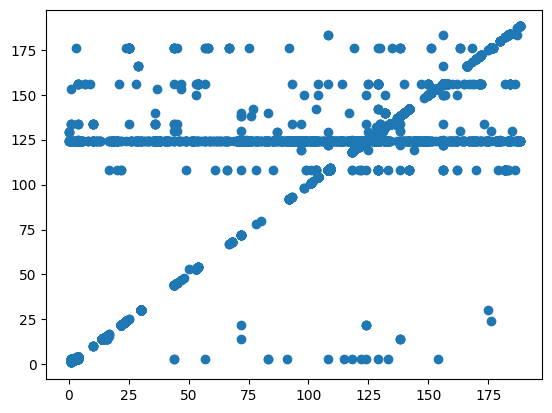

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score

vectorizer = CountVectorizer(min_df=1)
X = vectorizer.fit_transform(df["work_name_cor"]).toarray()
y = df["target"]

clf = RandomForestClassifier(max_depth=15, random_state=0);
clf.fit(X, y);
y_pred = clf.predict(X);

plt.scatter(y, y_pred);

In [34]:
!pip install sentence-transformers

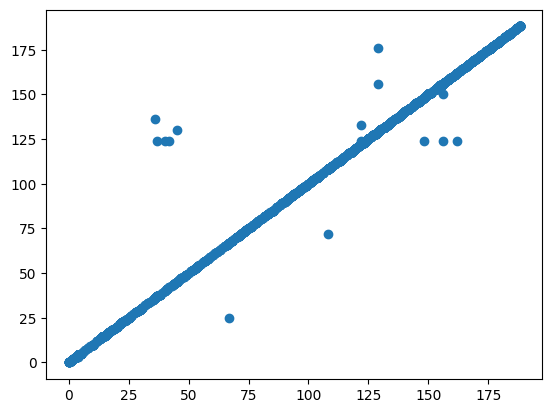

In [35]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
X = model.encode(df["work_name_cor"].to_list())
y = df["target"]

clf = RandomForestClassifier(max_depth=15, random_state=0);
clf.fit(X, y);
y_pred = clf.predict(X);

plt.scatter(y, y_pred)

# Test dataset

In [55]:
!ls drive/MyDrive/itmo_job

 lab2_test_cor.csv    news.csv
 lab2_test.csv	     'Заверение о незамещении гос.службы.doc'
 lab2_test_lem.csv   '_Личный листок.doc'
 lab2_train_cor.csv  '_регламент для трудоустройства (дистанционный).docx'
 lab2_train.csv      'Согласие на обработку ПДН_общее.pdf'
 lab2_train_lem.csv  'Согласие на обработку ПДн (размещение на сайте).pdf'
 models


In [56]:
test = pd.read_csv("drive/MyDrive/itmo_job/lab2_test_cor.csv")
test = test[["work_name_cor", "generalized_work_class_cor"]].dropna()
test.drop_duplicates(inplace=True)
print(len(test))
test.head()

5871


,work_name_cor,generalized_work_class_cor
0,монтаж шаровой кран дроссельный шайба запорный...,монтаж мк
1,монтаж типа зра электропривод,монтаж зра
2,монтаж оборудование прибор,монтаж прибор
3,тх поза монтаж арматура,монтаж арматура
5,монтаж оголовник свая поза,монтаж оголовок


In [57]:
test["target"] = lbl.fit_transform(test["generalized_work_class_cor"].values.astype('str'))
test.head()

,work_name_cor,generalized_work_class_cor,target
0,монтаж шаровой кран дроссельный шайба запорный...,монтаж мк,124
1,монтаж типа зра электропривод,монтаж зра,104
2,монтаж оборудование прибор,монтаж прибор,142
3,тх поза монтаж арматура,монтаж арматура,70
5,монтаж оголовник свая поза,монтаж оголовок,130


In [58]:
X_test = model.encode(test["work_name_cor"].to_list())
y_test = test["target"]

In [59]:
def forest(depth=5, plot=False):
    clf = RandomForestClassifier(max_depth=depth, random_state=0);
    clf.fit(X, y);
    y_cal = clf.predict(X);
    y_pred = clf.predict(X_test);

    if plot:
        plt.subplot(1, 2, 1);
        plt.scatter(y, y_cal);
        plt.xlabel("Want");
        plt.ylabel("Have");
        plt.title("Train data");
        plt.subplot(1, 2, 2);
        plt.scatter(y_test, y_pred);
        plt.xlabel("Want");
        plt.ylabel("Have");
        plt.title("Test data");

    metrics = {
        "calibration": {
            "accuracy": accuracy_score(y, y_cal),
            "f1 score": f1_score(y, y_cal, average="macro")
        },
        "prediction": {
            "accuracy": accuracy_score(y_test, y_pred),
            "f1 score": f1_score(y_test, y_pred, average="macro")
        }
    }
    return metrics

In [ ]:
plt.rcParams["figure.figsize"] = (16, 8)

cal_acc = []
cal_f1 = []
pre_acc = []
pre_f1 = []

start = 1

for d in range(start, 16):
    print(d, end=" ")
    met = forest(depth=d)
    cal_acc.append(met["calibration"]["accuracy"])
    cal_f1.append(met["calibration"]["f1 score"])
    pre_acc.append(met["prediction"]["accuracy"])
    pre_f1.append(met["prediction"]["f1 score"])

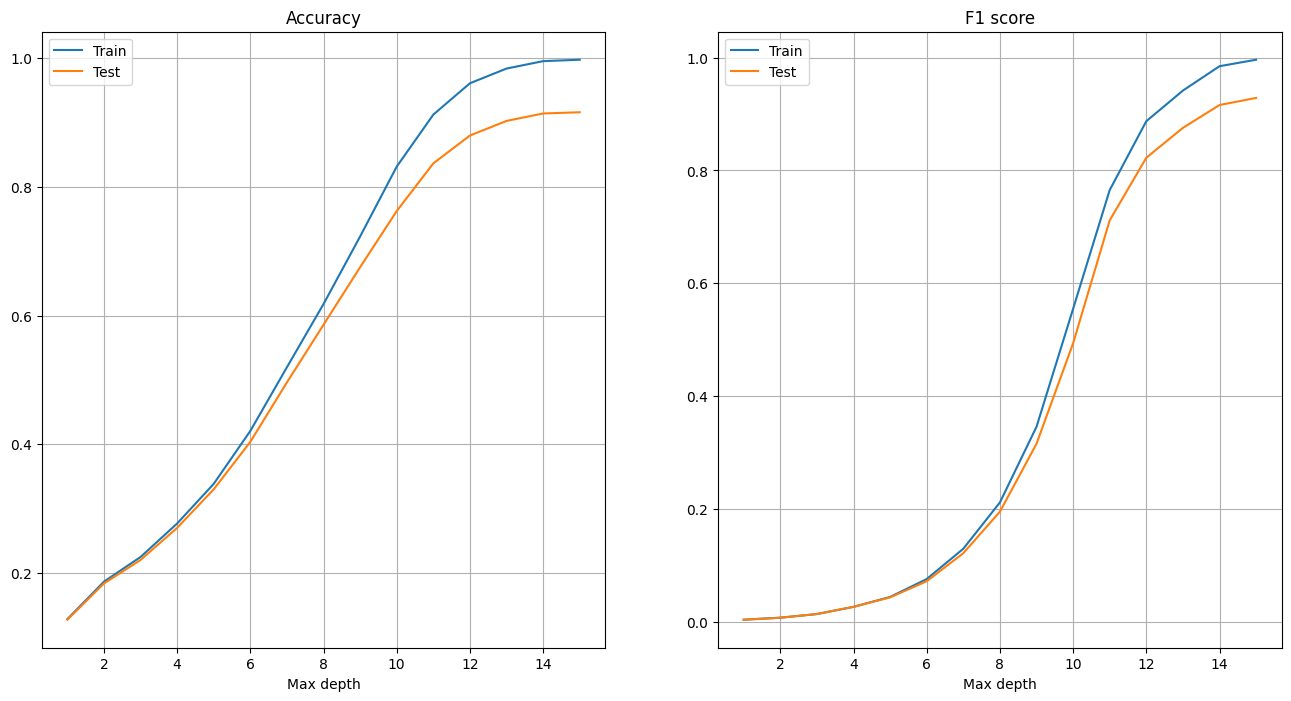

In [65]:
plt.subplot(1, 2, 1);
plt.plot(list(range(start, len(cal_acc)+start)), cal_acc, label="Train");
plt.plot(list(range(start, len(pre_acc)+start)), pre_acc, label="Test");
plt.grid();
plt.legend();
plt.xlabel("Max depth");
plt.title("Accuracy");

plt.subplot(1, 2, 2);
plt.plot(list(range(start, len(cal_f1)+start)), cal_f1, label="Train");
plt.plot(list(range(start, len(pre_f1)+start)), pre_f1, label="Test");
plt.grid();
plt.legend();
plt.xlabel("Max depth");
plt.title("F1 score");

{
    "calibration": {
        "accuracy": 0.9952816278383958,
        "f1 score": 0.9847526248196087
    },
    "prediction": {
        "accuracy": 0.913983989098961,
        "f1 score": 0.9159237333842551
    }
}


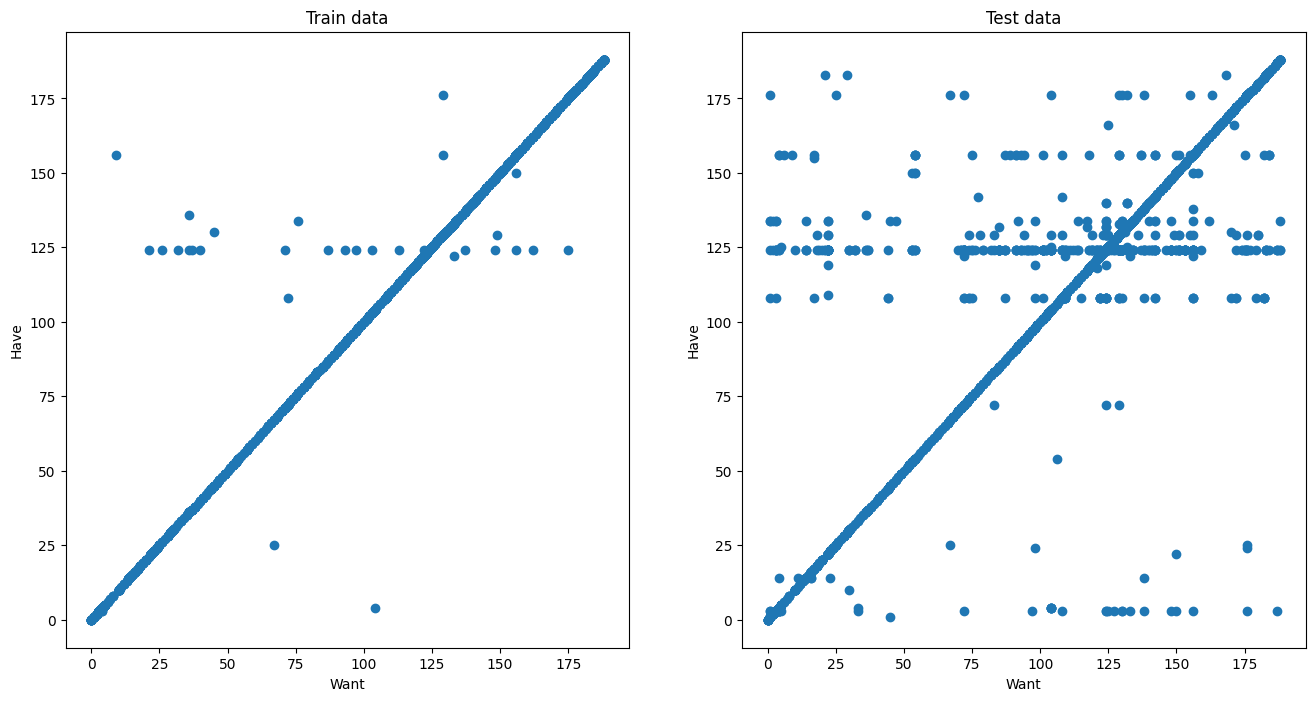

In [67]:
import json

met = forest(depth=14, plot=True)

print(json.dumps(met, indent=4))